In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

ALG KNN

In [35]:
class KNN:
    def __init__(self, K=1, distancia='euclidiana'):
        self.K = K
        self.distancia = distancia

    def euclidiana(self, x):
        return np.sqrt(np.sum((self.X - x)**2, axis=1))

    def mahalanobis(self, x):
        cov = np.cov(self.X.T)
        inv_cov = np.linalg.inv(cov)
        dif = self.X - x
        return np.sqrt(np.sum(dif @ inv_cov * dif, axis=1))

    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)
        return self

    def predict(self, x):
        x = np.atleast_2d(x)
        preds = []

        for xi in x:
            if self.distancia == 'euclidiana':
                dist = self.euclidiana(xi)
            elif self.distancia == 'mahalanobis':
                dist = self.mahalanobis(xi)
            else:
                print("Escolha 'euclidiana' ou 'mahalanobis'")

            idx = np.argsort(dist)[:self.K]
            vizinhos = self.y[idx]

            valores, contagens = np.unique(vizinhos, return_counts=True)
            preds.append(valores[np.argmax(contagens)])

        return np.array(preds)

------------

1. Considere o conjunto de dados disponível em kc2.csv, organizado em 22 colunas, sendo as 21 primeiras colunas os atributos e a última coluna a saída. Os 21 atributos são referentes à caracterização de códigos-fontes para processamento de dados na NASA. A saída é a indicação de ausência (0) ou existência (1) de defeitos (os dados foram balanceados via subamostragem). Maiores detalhes sobre os dados podem ser conferidos em https://www.openml.org/search?type=data&sort=runs&id=1063&status=active.

In [36]:
data = np.loadtxt('lista\\lista_03_ama\\kc2.csv', delimiter=',')

In [37]:
X, y = data[:,:21], data[:, 21].reshape(-1, 1)

a. Considerando uma validação cruzada em 10 folds, avalie modelos de clas
sificação binária nos dados em questão. Para tanto, use as abordagens
 abaixo:

– KNN (escolha k = 1 e k = 5, distância Euclidiana e Mahalonobis, totalizando 4 combinações);
– Árvore de decisão (você pode usar uma implementação já existente, como a do scikit-learn, com índices de impureza de gini e entropia)

In [38]:
def train_test(X, y, test_size = 0.2, seed=1):
    rnd = np.random.RandomState(seed)

    index = np.arange(X.shape[0])
    rnd.shuffle(index)
    test_index = index[:int(X.shape[0] * test_size)]
    train_index = index[int(X.shape[0] * test_size):]

    xtest = X[test_index]
    ytest = y[test_index]

    xtrain = X[train_index]
    ytrain = y[train_index]

    return xtrain, ytrain, xtest, ytest


def fold(x, y, modelo, folds=10, knn_=False):

    f1_scores = []
    acuracias = []
    revocacao = []
    for i in range(folds):
        xtrainf, ytrainf, xtestf, ytestf = train_test(x, y)
         
        model = modelo.fit(xtrainf, ytrainf)  

    
        pred = model.predict(xtestf) 
        
        f1_scores.append(
            f1_score(ytestf, pred)
        )
        acuracias.append(
            accuracy_score(ytestf, pred)
        )
        revocacao.append(
            recall_score(ytestf, pred)
        )
    
    return pd.DataFrame(
        dict(
            f1_score = f1_scores,
            acuracia = acuracias,
            revocacao = revocacao
        )
    )

* KNN (escolha k = 1 e k = 5, distância Euclidiana e Mahalonobis, totalizando 4 combinações)

In [39]:
knn_1 = fold(X, y, KNN(K=1), knn_=True)

In [40]:
knn_2 = fold(X, y, KNN(K=2), knn_=True)

In [41]:
knn_3 = fold(X, y, KNN(K=3), knn_=True)

In [42]:
knn_4 = fold(X, y, KNN(K=4), knn_=True)

In [43]:
tree = fold(X, y, DecisionTreeClassifier())

b. Para cada modelo criado, reporte valor médio e desvio padrão das métricas
de acurácia, revocação, precisão e F1-score.
1

`KNN 1`

In [52]:
knn_1.agg(['mean', 'std', 'max', 'min'])

,f1_score,acuracia,revocacao
mean,6.486486e-01,0.690476,0.705882
std,1.170278e-16,0.000000,0.000000
max,6.486486e-01,0.690476,0.705882
min,6.486486e-01,0.690476,0.705882


`KNN 2`

In [53]:
knn_2.agg(['mean', 'std', 'max', 'min'])

,f1_score,acuracia,revocacao
mean,6.451613e-01,0.738095,5.882353e-01
std,1.170278e-16,0.000000,1.170278e-16
max,6.451613e-01,0.738095,5.882353e-01
min,6.451613e-01,0.738095,5.882353e-01


`KNN 3`

In [ ]:
knn_3.agg(['mean', 'std', 'max', 'min'])

,f1_score,acuracia,revocacao
mean,0.777778,0.809524,0.823529
std,0.000000,0.000000,0.000000
max,0.777778,0.809524,0.823529
min,0.777778,0.809524,0.823529


`KNN 4`

In [55]:
knn_4.agg(['mean', 'std', 'max', 'min'])


,f1_score,acuracia,revocacao
mean,0.764706,0.809524,0.764706
std,0.000000,0.000000,0.000000
max,0.764706,0.809524,0.764706
min,0.764706,0.809524,0.764706


`Arvore de decisão`

In [56]:
tree.agg(['mean', 'std', 'max', 'min'])


,f1_score,acuracia,revocacao
mean,0.739082,0.778571,0.776471
std,0.030124,0.022588,0.046401
max,0.777778,0.809524,0.823529
min,0.685714,0.738095,0.705882


plots

`knn 1`

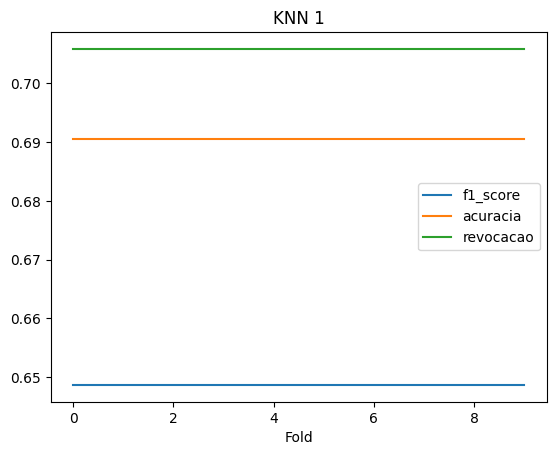

In [66]:
knn_1.plot()
plt.title('KNN 1')
plt.xlabel('Fold')
plt.show()

`KNN 2`

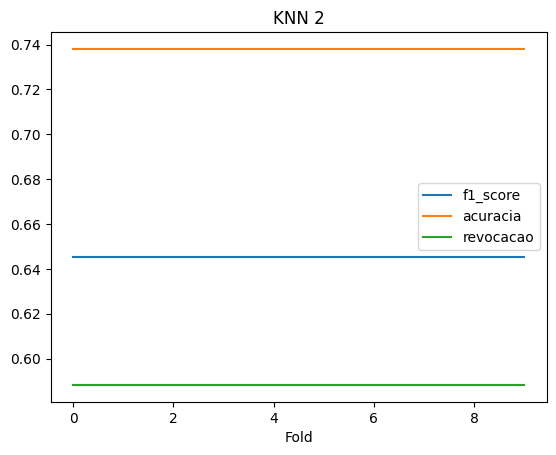

In [ ]:
knn_2.plot()
plt.title('KNN 2')
plt.xlabel('Fold')
plt.show()

`KNN 3`

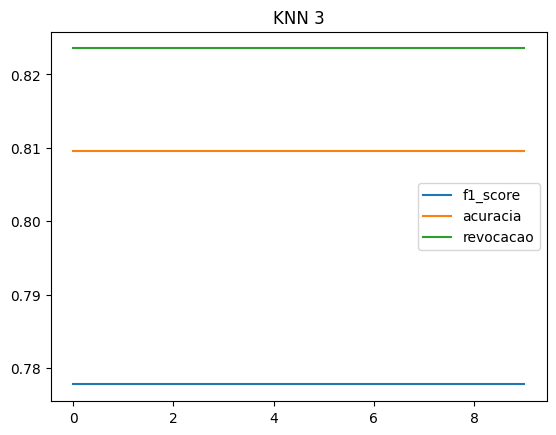

In [60]:
knn_3.plot()
plt.title('KNN 3')
plt.show()

`KNN 4`

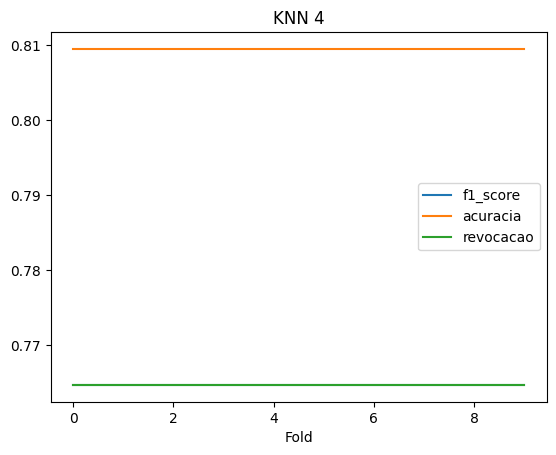

In [67]:
knn_4.plot()
plt.title('KNN 4')
plt.xlabel('Fold')
plt.show()

`Arvore de decisão`

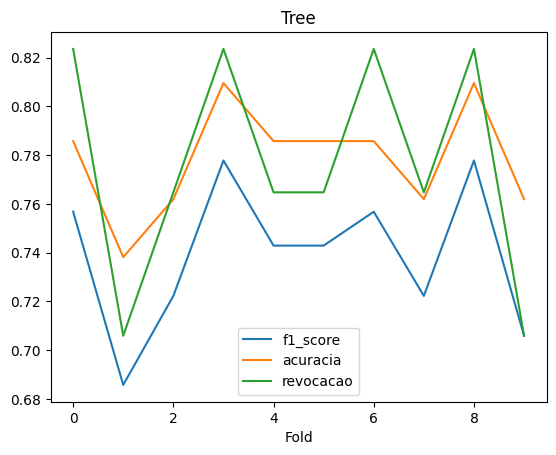

In [68]:
tree.plot()
plt.title('Tree')
plt.xlabel('Fold')
plt.show()